<a href="https://colab.research.google.com/github/valerymamontov/colab_notebooks/blob/main/Parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Сбор данных с сайта и их простая визуализация

Используется [таблица рождаемости в России за 1959-2020 год](https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html).  
Цель спарсить данные и визуализировать (показать на линейном графике тренд).

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

url = "https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html"
r = requests.get(url)
html = BeautifulSoup(r.content)

data = []

table = html.find("table")
for tr in table.find_all("tr"):
    data.append([td.get_text().replace(" ", "") for td in tr.find_all("td")])

In [ ]:
df = pd.DataFrame(data[1:], columns=["year", "borned"])
df["borned"] = df["borned"].astype("int") # приводим к инту
df["year"] = df["year"].str.slice(0,4) # отрезаем первые четыре символа, т.е. год

In [ ]:
df = df.set_index("year")

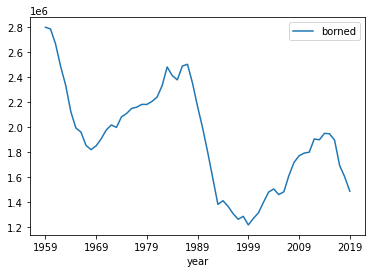

In [ ]:
df.plot.line()
plt.show()